# Crafting a Data Story: Starbucks Calorie Information #

The American Heart Association (AHA) [recommends](https://pubmed.ncbi.nlm.nih.gov/19704096/) Americans _drastically_ cut back on added sugar to help slow the obesity & heart disease epidemics in the US.

They've found that sugar-sweetened beverages and breakfast cereals are two of the most serious offenders of added sugar content in their products.

Starbucks is one of the companies that sells more beverages in the US, if not the world. I'll investigate to what extent the beverages sold by Starbucks have added sugars and determine if any change to their added sugar intake can help Americans decrease the amount of added sugar consumption.

Using calorie data of Starbucks drink menu items to craft a data story that will illuminate the following:

- The data questions I asked
- The trends I investigated
- The visualizations I developed
- The conclusions I came to

In [1]:
# Loading python packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme(context = 'paper', style = 'whitegrid', palette = 'rocket')
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data ##

All nutritional information reflects a 12 oz. serving size. Data retrieved from [Kaggle](https://www.kaggle.com/starbucks/starbucks-menu).

In [2]:
# Loading data with NaN values coded
df_raw = pd.read_csv('data/starbucks-menu-nutrition-drinks.csv', na_values=['-'])
df_raw.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
1,Ombré Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
2,Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
3,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0


In [3]:
# Cleaning data via adding a new name for that first column
df_raw.rename({'Unnamed: 0': 'DrinkName'}, axis = 1, inplace = True)
df_raw.columns

Index(['DrinkName', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium'],
      dtype='object')

In [4]:
# Looking into NaN
df_raw.isna().sum()

DrinkName     0
Calories     85
Fat (g)      85
Carb. (g)    85
Fiber (g)    85
Protein      85
Sodium       85
dtype: int64

Because all of the columns have the same _NaN_ totals, this means that entire rows are filled with them. For the purposes of this exercise/notebook, I'll be dropping those rows.

In [5]:
df = df_raw.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DrinkName  92 non-null     object 
 1   Calories   92 non-null     float64
 2   Fat (g)    92 non-null     float64
 3   Carb. (g)  92 non-null     float64
 4   Fiber (g)  92 non-null     float64
 5   Protein    92 non-null     float64
 6   Sodium     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


## Data Exploration ##

Asking of the data:

- What does the distribution of Calories, Fat, Carbohydrates, Fiber, Protein & Sodium look like?
  - This is to see if there're any interesting (worrying?) values

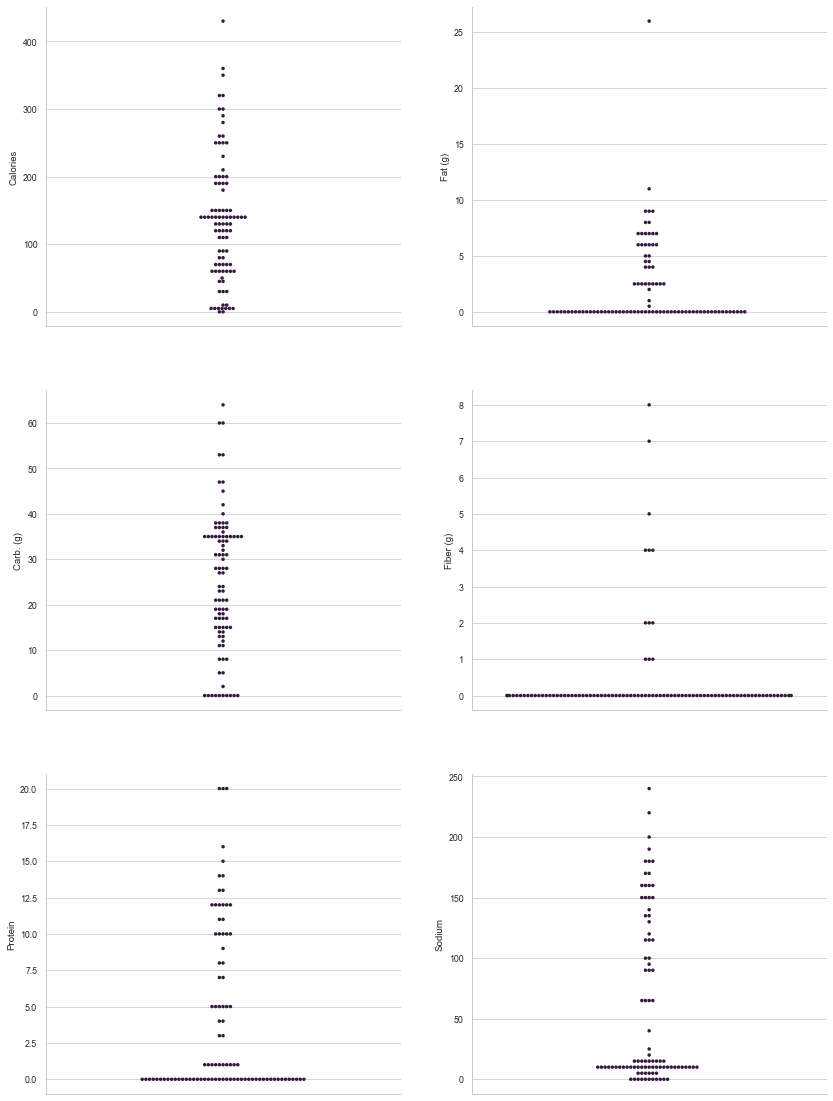

In [6]:
fig = plt.figure(figsize = (14,20))


for column in range(1, len(df.columns)):
    plt.subplot(3,2,column)
    sns.swarmplot(y = df[df.columns[column]], s = 3.5)
    sns.despine()

From the swarm plots it looks like a lot of the drinks aren't fat-laden (**nearly all** are under 10g). 
- This implies that the calories in the drinks are primarily driven by carbohydrates (sugar). 
- This is very much the case gien how few drinks have more than 0g of Fiber.

However, let's explore the relationships a bit further...

## Carbohydrates & Calories: A Relationship? ##

- Is there a relatinoship between Carbohydrates and Calories?
- If so, how strong is that relationship?
- What's the distribution of drinks that have specific Carbohydrate gram-levels?

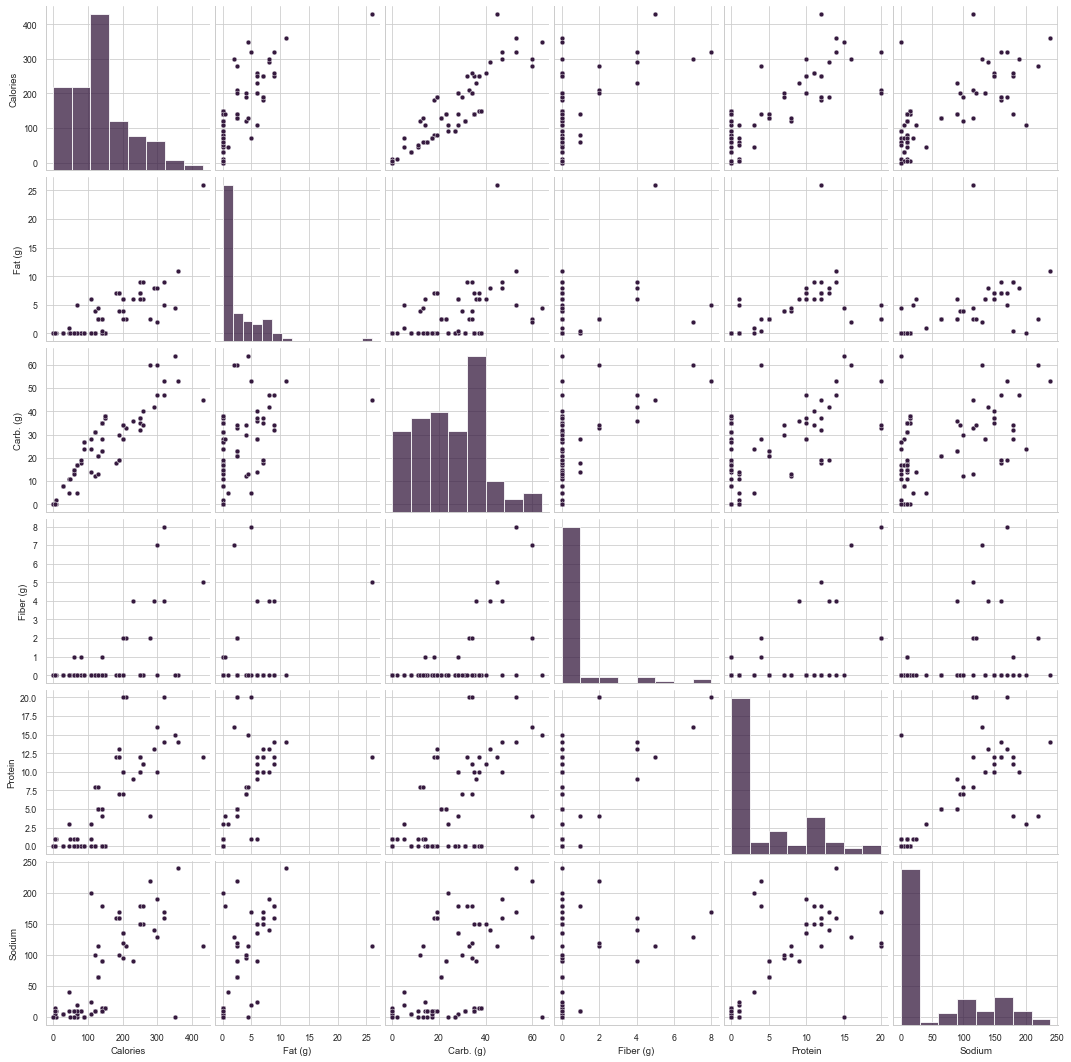

In [7]:
sns.pairplot(df)

As I assumed, there's a **strong**, **positive relationship** between Calories and Carbohydrates vs Calories against Fat. 

Another _intersting relationship_ which I hadn't considered, is that between Calories & Protein. There's a positive relationship there, not as tightly bound as Carbohydrates, but it's there. 

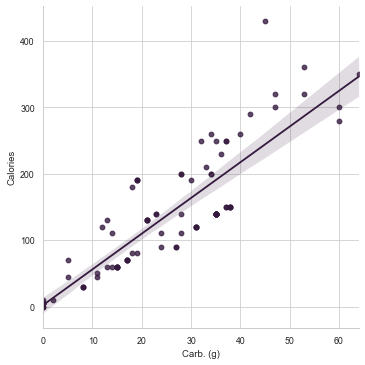

In [8]:
# Looking more closely at relationship between Calories & Carbohydrates
sns.lmplot(x = df.columns[3], y = df.columns[1], data = df)
sns.despine()

So, it's looking like an increase in the single digits of Carbohydrate grams is associated with a 10-fold increase in Calories.

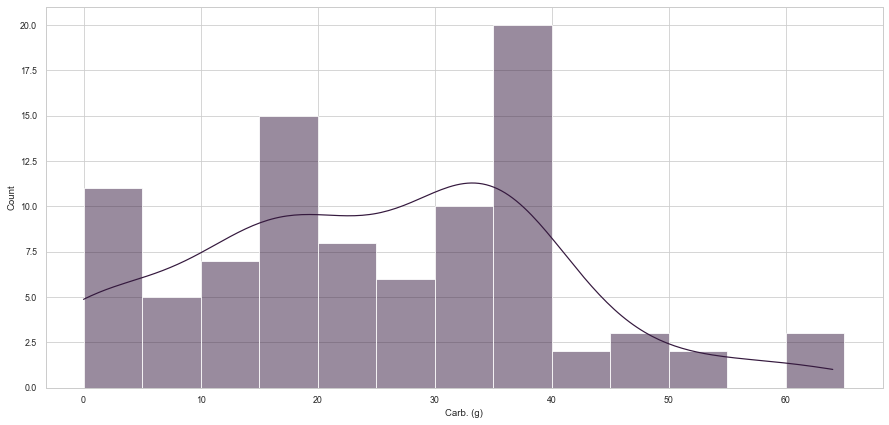

In [9]:
# Looking more closely at the distribution of Carbohydrates among the drinks
plt.figure(figsize = (15,7))
sns.histplot(df, x = df[df.columns[3]], kde = True, binwidth = 5)

From this histogram, we can see that the majority of drinks have between 15 & 40g of Carbohydrates. Astonishingly, _20 drinks_ have **35 to 40g** of Carbohydrates.

## Findings & Trends ##

The data suggests that the upward trend of Cabohydrates contributes robustly to the Calorie count of Starbucks drinks.

The majority of drinks have Carbohydrate counts above 15g, with the most numerous of drinks containing ~35g.

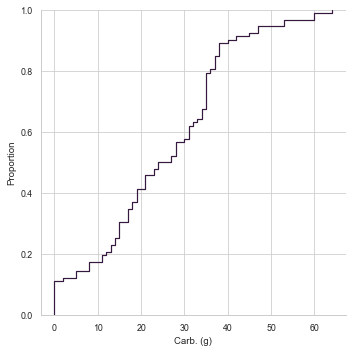

In [10]:
sns.displot(df, x = df.columns[3], kind="ecdf")

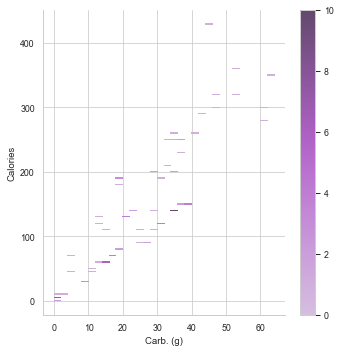

In [11]:
sns.displot(df, x = df.columns[3], y = df.columns[1], binwidth=(2, .5), cbar=True)

Above, we can see that drinks with Carbohydrate grams of of 15 to 40 represent **more than half** of the drinks in the dataset.

As we've seen in the linear plot, there's about a 1 to 10 ratio orf relationship between Calories and Carbohydrates, i.e. an increase of 1g Carbohydrates approximates 10 Calories increase.

## Conclusions ##

As this is more geared towards a general, health-conscious audience I'll gear my conslusions to have less jargon & 'insider' terms.

The AHA suggests an added-sugar limit of no more than 100 calories per day (about 6 teaspoons or 24 grams of sugar) for most women and no more than 150 calories per day (about 9 teaspoons or 36 grams of sugar) for most men.

Given our data distribution, having just 1 Starbucks drink, with the majority having between 15 and 40 grams of Carbohydrates, will take most women & men to the limits of the AHA's added sugar consumption recommendations.

Indeed, AHA has determined that the average American consumes 22 teaspoons of added sugar a day, which amounts to an extra 350 calories.

Particularly damaging is that the AHA has found that there’s no nutritional need or benefit that comes from eating added sugar. Furthermore, [studies](https://pubmed.ncbi.nlm.nih.gov/21519237/) show liquid carbohydrates, like sugar-sweetened beverages, are less filling and cause one to continue to feel hungry after drinking them despite, their high caloric value.

Recommendations are for Americans to avoid those drinks with higher grams of Carbohydrates, especially at Starbucks which almsot exclusively specializes in liquid forms of added sugar. The good news is that a mere single digit of decrease, say 5g, can significantly reduce not only the amount of Calories in a drink, but also the number of liquid grams of sugar, the less satiating kind, being consumed.

Further analysis can aim to look at sales figures against Carbohydrate content of drinks in addition.